#Tugas Besar 2 Pemodelan Simulasi
Annisa Miranda - 1301184378

Ajeung Angsaweni - 1301180108

##Import Libraries

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera as Camera

##Initializing

In [ ]:
Camera = Camera(plt.figure())
#Scalar variables
individuals = 200
infectionRatio = 0.05
moveProb = 0.8
recoveryTime = 10
infectionTotal = []
tempInfection = int(individuals * infectionRatio)

#Simulation room
x_min = 0
x_max = 20
y_min = 0
y_max = 20
x_range = x_max - x_min
y_range = y_max - y_min
x_pos = []
y_pos = []
x_infect = [0]
y_infect = [0]
x_health = [0]
y_health = [0]


<Figure size 432x288 with 0 Axes>

In [ ]:
#Individual positions
for i in range(individuals):
    x_pos.append(random.randint(x_min, x_max))
    y_pos.append(random.randint(y_min, y_max))

# Initializing health status
infectionStatus = [1 if i < tempInfection else 0 for i in range(individuals)]

#Initializing imunity status
imunityStatus = [0 for i in range(individuals)]

#initializing infected time
infectedTime = [0 for i in range(individuals)]

In [ ]:
#Updating positions
def position(x, y):
    randomPos = random.random()
    #right
    if (randomPos <= 0.25):
        x = x + 1
    #down
    elif (randomPos <= 0.5):
        y = y - 1
    #left
    elif (randomPos <= 0.75):
        x = x - 1
    #up
    else:
        y = y + 1
    return [x, y]

In [ ]:
#Periodic Boundary Condition
def pbc(x, y):
    #Correction X axis
    if (x > x_max):
        x = x - x_range
    if (x < x_min):
        x = x + x_range
    #Correction Y axis
    if (y > y_max):
        y = y - y_range
    if (y < y_min):
        y = y + y_range
    return [x, y]

In [ ]:
#Healthy individual = Infected individual
def samePos(x, y, x_pos, y_pos):
    status = 0
    i = 0
    while ((status == 0) & (i < individuals)):
        if ((infectionStatus[i]) & (x_pos[i] == x) & (y_pos[i] == y)):
            status = 1
        i = i + 1
    return status

In [ ]:
#Visualizing covid19 case per day using scatter plot
def make_scatter(x,y,status,i):
    colormap = np.array(['b', 'r'])
    plt.scatter(x, y, s=25, c=colormap[status], alpha=0.5)
    plt.title('Persebaran Hari ke-{:d}'.format(i), fontweight="bold")
    plt.savefig('./grafik/fig_{:04d}.png'.format(i), format='png', dpi=1000, bbox_inches='tight')
    plt.clf()

##Iteration

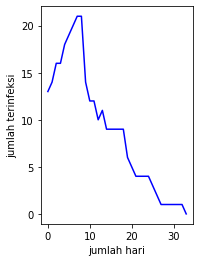

In [ ]:
day = 0
days = [day]
#Iteration
while (tempInfection > 0):
    day += 1
    days.append(day)
    
    for j in range(individuals):
        #Update position based on individual probability of moving
        randProb = random.uniform(0,1)
        if(randProb >= moveProb):
            positionUpdate = position(x_pos[j], y_pos[j])
        else:
            positionUpdate = [x_pos[j], y_pos[j]]
            
        #Correction using PBC
        correction = pbc(positionUpdate[0], positionUpdate[1])

        #Individual Infected Time Update
        if (infectionStatus[j]):
            infectedTime[j] = infectedTime[j] + 1

        #Individual health - recovery status updates
        if (infectedTime[j] >= recoveryTime):
            imunityStatus[j] = 1
            infectionStatus[j] = 0
            infectedTime[j] = 0
            tempInfection = tempInfection - 1

        #Individual health - infection status updates
        if (~imunityStatus[j] & ~infectionStatus[j] & samePos(correction[0], correction[1], x_pos, y_pos)):
            infectionStatus[j] = 1
            tempInfection = tempInfection + 1

        #Update new posisiton
        x_pos[j] = correction[0]
        y_pos[j] = correction[1]

        #pos = [x_pos[j], y_pos[j]]
        if (infectionStatus[j]):
            x_infect.append(x_pos[j])
            y_infect.append(y_pos[j])
        else:
            x_health.append(x_pos[j])
            y_health.append(y_pos[j])

    #Changes of infection
    infectionTotal.append(tempInfection)
    
    #Plotting
    plt.figure(1)
    plt.subplot(1, 2, 1)
    make_scatter(x_pos, y_pos, infectionStatus, day)
    plt.title("Simulation of Random Walk Virus Spread")
    plt.subplot(1, 2, 2)
    plt.plot(infectionTotal, color='blue')
    plt.xlabel('Number of days')
    plt.ylabel('Number of Infected People')
    Camera.snap()

In [ ]:
for i in range(len(infectionTotal)):
    print('Day '+str(days[i]))
    print('Infected total: '+str(infectionTotal[i]))

Day 0
Infected total: 13
Day 1
Infected total: 14
Day 2
Infected total: 16
Day 3
Infected total: 16
Day 4
Infected total: 18
Day 5
Infected total: 19
Day 6
Infected total: 20
Day 7
Infected total: 21
Day 8
Infected total: 21
Day 9
Infected total: 14
Day 10
Infected total: 12
Day 11
Infected total: 12
Day 12
Infected total: 10
Day 13
Infected total: 11
Day 14
Infected total: 9
Day 15
Infected total: 9
Day 16
Infected total: 9
Day 17
Infected total: 9
Day 18
Infected total: 9
Day 19
Infected total: 6
Day 20
Infected total: 5
Day 21
Infected total: 4
Day 22
Infected total: 4
Day 23
Infected total: 4
Day 24
Infected total: 4
Day 25
Infected total: 3
Day 26
Infected total: 2
Day 27
Infected total: 1
Day 28
Infected total: 1
Day 29
Infected total: 1
Day 30
Infected total: 1
Day 31
Infected total: 1
Day 32
Infected total: 1
Day 33
Infected total: 0
